# Food Inspection : City of Chicago

## Problem Overview : 

#### I have always been interested in exploring new eateries as a foodie. As a result, in this research, I chose to satisfy my hunger by collecting and analyzing data from restaurants. 

#### An investigation of food inspection was undertaken using data from the Chicago Data Portal. These inspections help to protect public health by ensuring food safety and preventing foodborne illness. 

#### The project's purpose is to investigate restaurants in Chicago and classify the results as pass, pass with conditions, or fail based on the inspection type and violations. 

#### It's a difficult task with various classifications.

#### The feature variable is violations, and the target variable is Results.

## Data description : 

#### Chicago food inspection dataset contains information from inspections of restaurants and other food establishments in Chicago from January 1, 2010 to the present.
#### It consist of 228330 rows and 17 columns.
#### Data : https://data.cityofchicago.org/api/assets/BAD5301B-681A-4202-9D25-51B2CAE672FF
#### Dataset : https://data.cityofchicago.org/Health-Human-Services/Food-Inspections/4ijn-s7e5/data

## Basic Understanding of data

#### Importing relevant Libraries

In [56]:
import numpy as np 
import pandas as pd
import seaborn as sns
import datetime
import folium
import warnings
import missingno as msno
import matplotlib.pyplot as plt
from folium import folium, plugins
from IPython.display import HTML
%matplotlib inline

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve,roc_auc_score

In [58]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [59]:
# As it is a large datset I am filtering the warnings. 
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
# Reading the csv file.
df = pd.read_csv("/Users/shivanireddy/Downloads/Food_Inspections.csv")

In [3]:
# Displaying head of the dataframe.
df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2549438,SUBWAY,SUBWAY,2163012.0,Restaurant,Risk 1 (High),4157 W Peterson AVE,CHICAGO,IL,60646.0,02/04/2022,Canvass,Pass,NaN,41.989965,-87.733433,"(-87.73343294255409, 41.98996531393315)"
1,2546910,EL POLLO BRAVO INC.,EL POLLO BRAVO INC.,2827455.0,NaN,All,4105 W 26TH ST,CHICAGO,IL,60623.0,01/25/2022,License,Not Ready,NaN,41.844109,-87.727181,"(-87.7271809910444, 41.84410922157218)"
2,2546282,MEZCALINA,MEZCALINA,2138371.0,Restaurant,Risk 1 (High),333 E BENTON PL,CHICAGO,IL,60601.0,01/07/2022,Canvass,Out of Business,NaN,41.885390,-87.618987,"(-87.61898671163952, 41.88539004666972)"
3,2546140,Stagg,Stagg,26521.0,School,Risk 1 (High),7424 S Morgan (1000W),CHICAGO,IL,60621.0,01/05/2022,Canvass,Pass,NaN,41.758927,-87.649253,"(-87.64925339921011, 41.758926687108456)"
4,2534370,THE KIDS' TABLE,THE KIDS' TABLE,2385468.0,Restaurant,Risk 1 (High),2864 N LINCOLN AVE,CHICAGO,IL,60657.0,10/05/2021,Canvass,Out of Business,NaN,41.933881,-87.660773,"(-87.66077309643254, 41.93388147268545)"


In [4]:
# Columns present.
df.columns

Index(['Inspection ID', 'DBA Name', 'AKA Name', 'License #', 'Facility Type',
       'Risk', 'Address', 'City', 'State', 'Zip', 'Inspection Date',
       'Inspection Type', 'Results', 'Violations', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [5]:
# Number of rows and columns involved in the dataset.
df.shape

(233349, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233349 entries, 0 to 233348
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Inspection ID    233349 non-null  int64  
 1   DBA Name         233349 non-null  object 
 2   AKA Name         230864 non-null  object 
 3   License #        233331 non-null  float64
 4   Facility Type    228367 non-null  object 
 5   Risk             233277 non-null  object 
 6   Address          233349 non-null  object 
 7   City             233178 non-null  object 
 8   State            233297 non-null  object 
 9   Zip              233288 non-null  float64
 10  Inspection Date  233349 non-null  object 
 11  Inspection Type  233348 non-null  object 
 12  Results          233349 non-null  object 
 13  Violations       170420 non-null  object 
 14  Latitude         232554 non-null  float64
 15  Longitude        232554 non-null  float64
 16  Location         232554 non-null  obje

In [7]:
df.dtypes

Inspection ID        int64
DBA Name            object
AKA Name            object
License #          float64
Facility Type       object
Risk                object
Address             object
City                object
State               object
Zip                float64
Inspection Date     object
Inspection Type     object
Results             object
Violations          object
Latitude           float64
Longitude          float64
Location            object
dtype: object

In [8]:
df = df.rename(columns={'DBA Name': 'Legal Name', 'AKA Name': 'Public Name', 'License #':'License', 'Zip' : 'Zipcode' })

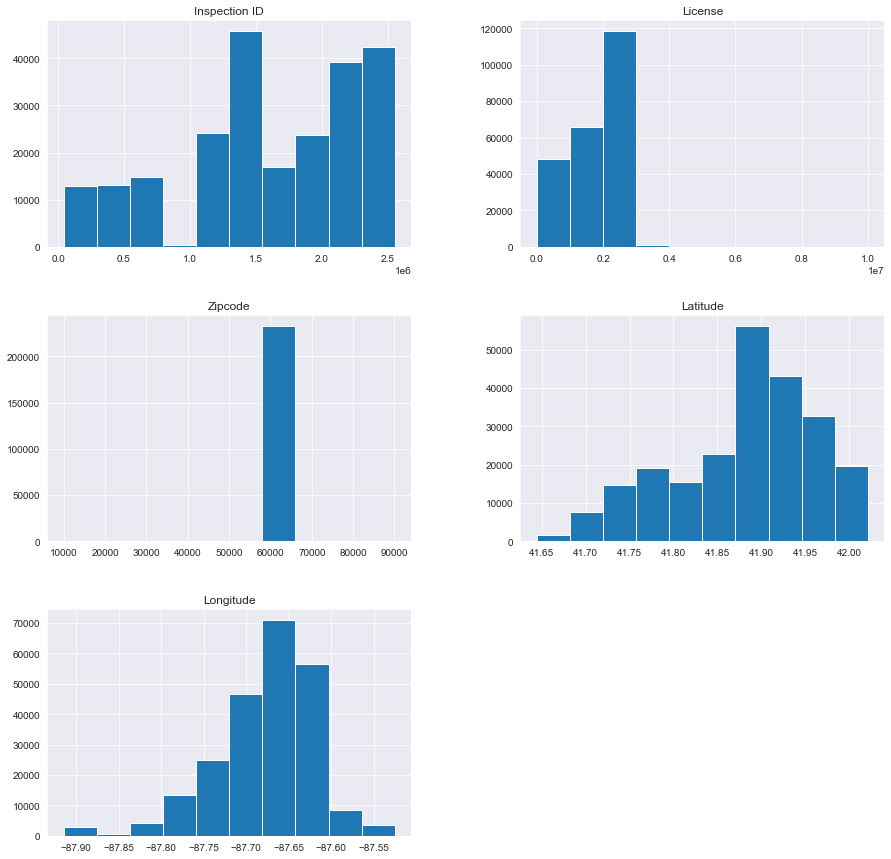

In [9]:
# Visualizing the dataset.
df.hist(figsize = (15,15))
plt.show()

<AxesSubplot:>

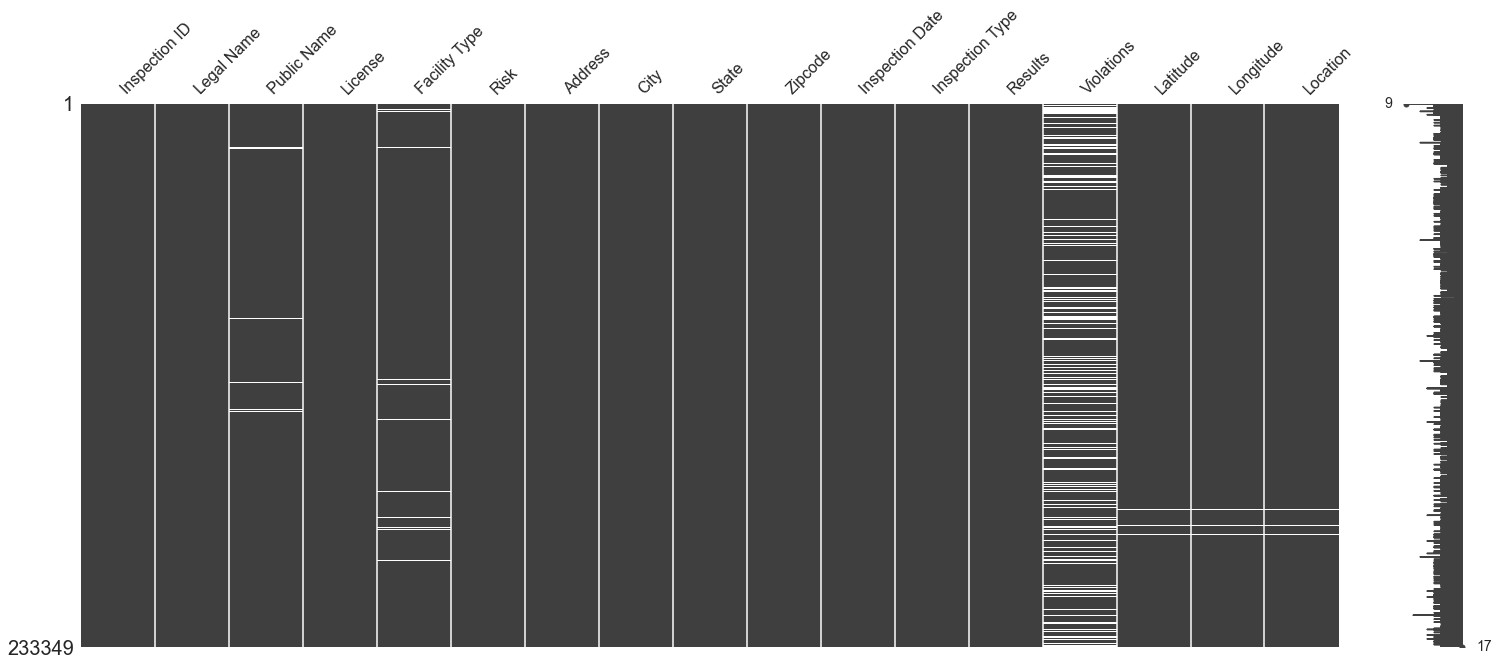

In [10]:
# Visualizing the missing values.
msno.matrix(df)

In [11]:
df.isnull().sum()

Inspection ID          0
Legal Name             0
Public Name         2485
License               18
Facility Type       4982
Risk                  72
Address                0
City                 171
State                 52
Zipcode               61
Inspection Date        0
Inspection Type        1
Results                0
Violations         62929
Latitude             795
Longitude            795
Location             795
dtype: int64

#### Only the violations column consist more missing values.

#### As it is a huge dataset we can drop all the Nan values.

#### If we impute the violation column also it's not useful for better analysis as it consist of text data.

In [12]:
# Droping all the null value columns.
df.dropna()

,Inspection ID,Legal Name,Public Name,License,Facility Type,Risk,Address,City,State,Zipcode,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
29,2521227,FURIOUS SPOON,FURIOUS SPOON,2551072.0,Restaurant,Risk 1 (High),800 W BELMONT AVE,CHICAGO,IL,60657.0,06/11/2021,Canvass,Fail,"1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOW...",41.940090,-87.649310,"(-87.64930995909579, 41.94009012484825)"
50,2492580,CHEESIE'S PUB & GRUB / SLICE OF CHEESIE'S,CHEESIE'S PUB & GRUB / SLICE OF CHEESIE'S,2575042.0,Restaurant,Risk 1 (High),958-964 W BELMONT AVE,CHICAGO,IL,60657.0,03/08/2021,Complaint,Fail,"1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOW...",41.940027,-87.653733,"(-87.65373272685191, 41.94002723561704)"
59,2484643,BQ AFROROOT CUISINE,BQ AFROROOT CUISINE,1803230.0,Restaurant,Risk 1 (High),4701 N KENMORE AVE,CHICAGO,IL,60640.0,02/09/2021,Canvass,Fail,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.967337,-87.656060,"(-87.65605959785111, 41.967336512668176)"
68,2484217,STRINGS RAMEN,STRINGS RAMEN,2492460.0,Restaurant,Risk 1 (High),919 W BELMONT AVE,CHICAGO,IL,60657.0,01/27/2021,Canvass,Fail,22. PROPER COLD HOLDING TEMPERATURES - Comment...,41.939828,-87.652316,"(-87.65231569879556, 41.93982841360136)"
69,2473118,MUNCHIES,SHARKS FISH & CHICKEN,2536103.0,Restaurant,Risk 2 (Medium),3900 W MADISON ST,CHICAGO,IL,60624.0,01/26/2021,Complaint,Fail,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.880865,-87.723376,"(-87.7233759677506, 41.880865155903734)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233342,67736,"MONTICELLO FOOD MART, INC","MONTICELLO FOOD MART, INC",2013259.0,Grocery Store,Risk 2 (Medium),1000 N MONTICELLO AVE,CHICAGO,IL,60651.0,01/05/2010,License,Fail,21. * CERTIFIED FOOD MANAGER ON SITE WHEN POTE...,41.899186,-87.717804,"(-87.71780427165159, 41.89918622853627)"
233343,67795,EMPEROR WOK,EMPEROR WOK,1874409.0,Restaurant,Risk 1 (High),2910 N ASHLAND AVE,CHICAGO,IL,60657.0,01/07/2010,Canvass,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.934562,-87.668621,"(-87.66862107234444, 41.93456195335931)"
233345,98314,THRESHOLD SCHOOL,THRESHOLD SCHOOL,2076658.0,School,Risk 1 (High),4219 N LINCOLN AVE,CHICAGO,IL,60618.0,01/05/2010,Canvass,Pass,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.958388,-87.681559,"(-87.68155929632958, 41.95838817038278)"
233346,96248,WAYNE MOY CHOP SUEY,WAYNE MOY CHOP SUEY,1302162.0,Restaurant,Risk 1 (High),6101 W 63RD ST,CHICAGO,IL,60638.0,01/06/2010,Canvass,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.777706,-87.773995,"(-87.77399488381793, 41.77770550864039)"


In [13]:
# Creating year, month, and day columns
df['Year'] = pd.DatetimeIndex(df['Inspection Date']).year
df['Month'] = pd.DatetimeIndex(df['Inspection Date']).month
df['Day'] = pd.DatetimeIndex(df['Inspection Date']).day

In [14]:
df

,Inspection ID,Legal Name,Public Name,License,Facility Type,Risk,Address,City,State,Zipcode,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location,Year,Month,Day
0,2549438,SUBWAY,SUBWAY,2163012.0,Restaurant,Risk 1 (High),4157 W Peterson AVE,CHICAGO,IL,60646.0,02/04/2022,Canvass,Pass,NaN,41.989965,-87.733433,"(-87.73343294255409, 41.98996531393315)",2022,2,4
1,2546910,EL POLLO BRAVO INC.,EL POLLO BRAVO INC.,2827455.0,NaN,All,4105 W 26TH ST,CHICAGO,IL,60623.0,01/25/2022,License,Not Ready,NaN,41.844109,-87.727181,"(-87.7271809910444, 41.84410922157218)",2022,1,25
2,2546282,MEZCALINA,MEZCALINA,2138371.0,Restaurant,Risk 1 (High),333 E BENTON PL,CHICAGO,IL,60601.0,01/07/2022,Canvass,Out of Business,NaN,41.885390,-87.618987,"(-87.61898671163952, 41.88539004666972)",2022,1,7
3,2546140,Stagg,Stagg,26521.0,School,Risk 1 (High),7424 S Morgan (1000W),CHICAGO,IL,60621.0,01/05/2022,Canvass,Pass,NaN,41.758927,-87.649253,"(-87.64925339921011, 41.758926687108456)",2022,1,5
4,2534370,THE KIDS' TABLE,THE KIDS' TABLE,2385468.0,Restaurant,Risk 1 (High),2864 N LINCOLN AVE,CHICAGO,IL,60657.0,10/05/2021,Canvass,Out of Business,NaN,41.933881,-87.660773,"(-87.66077309643254, 41.93388147268545)",2021,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233344,67803,HOUNDSTOOTH SALOON,DOS GRINGOS,41128.0,Restaurant,Risk 1 (High),3438 N CLARK ST,CHICAGO,IL,60657.0,01/08/2010,No Entry,Fail,NaN,41.944373,-87.654348,"(-87.65434805298078, 41.944372980166825)",2010,1,8
233345,98314,THRESHOLD SCHOOL,THRESHOLD SCHOOL,2076658.0,School,Risk 1 (High),4219 N LINCOLN AVE,CHICAGO,IL,60618.0,01/05/2010,Canvass,Pass,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.958388,-87.681559,"(-87.68155929632958, 41.95838817038278)",2010,1,5
233346,96248,WAYNE MOY CHOP SUEY,WAYNE MOY CHOP SUEY,1302162.0,Restaurant,Risk 1 (High),6101 W 63RD ST,CHICAGO,IL,60638.0,01/06/2010,Canvass,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.777706,-87.773995,"(-87.77399488381793, 41.77770550864039)",2010,1,6
233347,67768,MCDONALD'S #490,MCDONALD'S #490,81721.0,Restaurant,Risk 2 (Medium),10320 S KEDZIE AVE,CHICAGO,IL,60655.0,01/06/2010,Short Form Complaint,Fail,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.705520,-87.701458,"(-87.70145804220182, 41.70552029655878)",2010,1,6


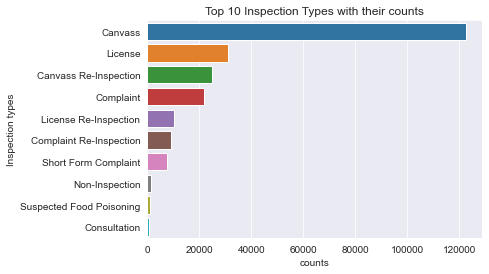

In [15]:
# Displaying top 10 Inspection Types with their counts
sns.barplot(x=df['Inspection Type'].value_counts()[:10],y=df['Inspection Type'].value_counts()[:10].index)
plt.title('Top 10 Inspection Types with their counts')
plt.xlabel('counts')
plt.ylabel('Inspection types')
plt.show()

#### Here we can notice top 10 inspection types.

#### We have a huge amount of data for better analysis I am considering only the inspection type with Canvass.

In [16]:
# Considering only Inspection Type with Canvass
df = df[df['Inspection Type']=='Canvass']
df.shape

(122795, 20)

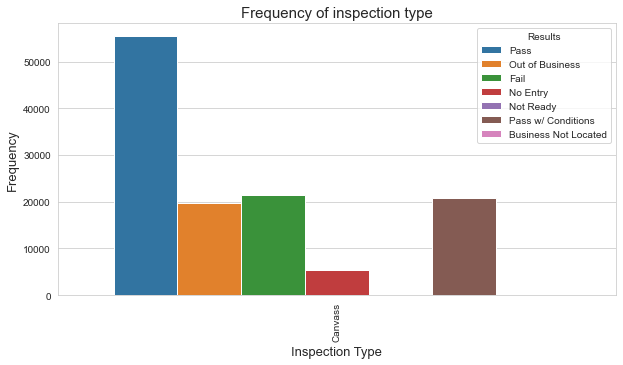

In [17]:
# Displaying frequency of Inspection along with the results.
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
fig=sns.countplot(x="Inspection Type", data=df ,hue='Results')
plt.title('Frequency of inspection type', fontsize=15)
plt.xlabel("Inspection Type", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
plt.xticks(rotation=90)
plt.show()

#### Here for inspection type canvass we can observe results with pass has more count.

#### We cannot visualize the results with not ready and bussiness not located because they are less in number.

#### From the above graph we can notice that Results with pass, fail and pass with conditions count is more, so I am removing rest of the results.

In [18]:
# Removing the results with less in number
df = df[~df.Results.isin(["Out of Business", "Business Not Located", "No Entry", "Not Ready"])]

In [19]:

df['Legal Name'].value_counts()[:20]

SUBWAY                          1867
DUNKIN DONUTS                    783
7-ELEVEN                         297
POTBELLY SANDWICH WORKS LLC      221
CHIPOTLE MEXICAN GRILL           192
POTBELLY SANDWICH WORKS          192
CORNER BAKERY CAFE               172
MCDONALD'S                       136
SUBWAY SANDWICHES                135
JIMMY JOHN'S                     133
FRESHII                          121
SPORTSERVICE SOLDIER FIELD       117
AU BON PAIN                      116
Subway                           115
JIMMY JOHNS                      109
STARBUCKS                        107
DOMINO'S PIZZA                   104
PROTEIN BAR                      100
DUNKIN DONUTS/BASKIN ROBBINS      98
TACO BELL                         96
Name: Legal Name, dtype: int64

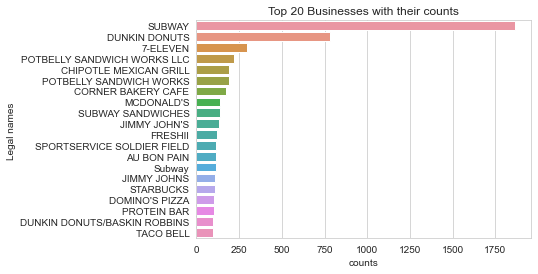

In [20]:
# Visualizing the top 20 business.
sns.barplot(x=df['Legal Name'].value_counts()[:20],y=df['Legal Name'].value_counts()[:20].index)
plt.title('Top 20 Businesses with their counts')
plt.xlabel('counts')
plt.ylabel('Legal names ')
plt.show()

#### We can notice subway has huge bussiness followed by Dunkin and 7-11.

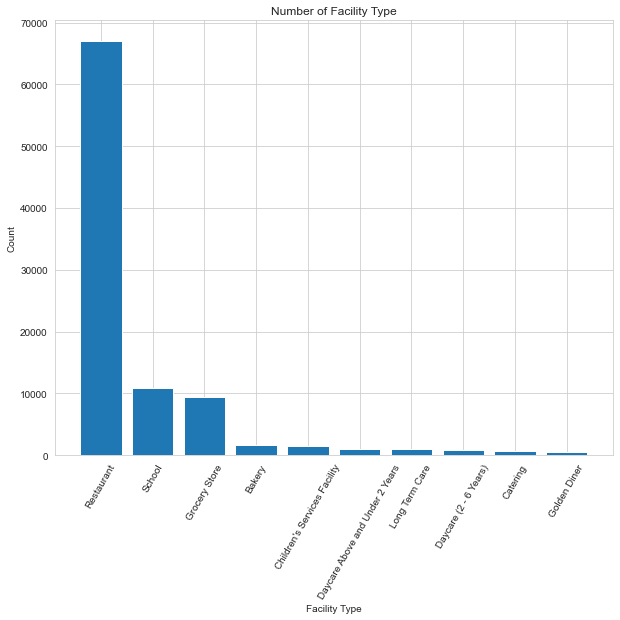

In [21]:
# visualizing the number of facility types
x = df['Facility Type'].value_counts().index.values.astype('str')[:10]
y = df['Facility Type'].value_counts().values[:10]
plt.figure(figsize = (10,8))
plt.bar(x,y)
plt.xticks(rotation = 60)
plt.xlabel("Facility Type")
plt.ylabel("Count")
plt.title("Number of Facility Type")
plt.show()

#### Here we can see thet facility type with restaurant,school and grocery store are huge in number.

In [22]:
# Types of risks with their count.
df['Risk'].value_counts()

Risk 1 (High)      77992
Risk 2 (Medium)    15951
Risk 3 (Low)        3647
Name: Risk, dtype: int64

<AxesSubplot:xlabel='Risk', ylabel='count'>

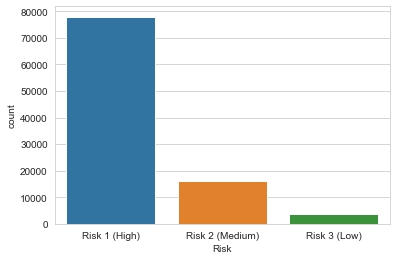

In [23]:
# visualizing the risk column.
sns.countplot(x=df['Risk'])

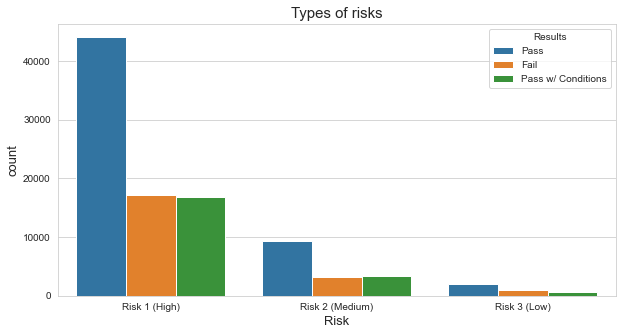

In [24]:
# Visualizing risk with results column.
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
fig=sns.countplot(x="Risk", data=df ,hue='Results')
plt.title('Types of risks', fontsize=15)
plt.xlabel("Risk", fontsize=13)
plt.ylabel("count", fontsize=13)
plt.show()

<Figure size 720x360 with 0 Axes>

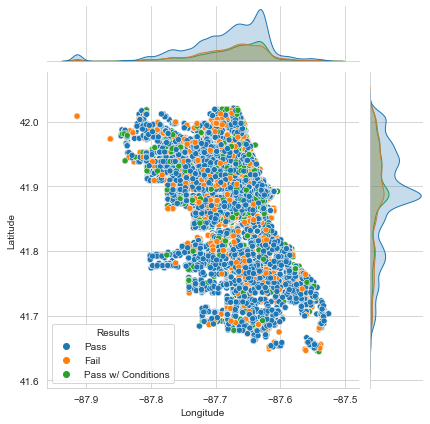

In [25]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.jointplot(y="Latitude", x="Longitude", data=df, hue = 'Results')
plt.show()

<Figure size 720x360 with 0 Axes>

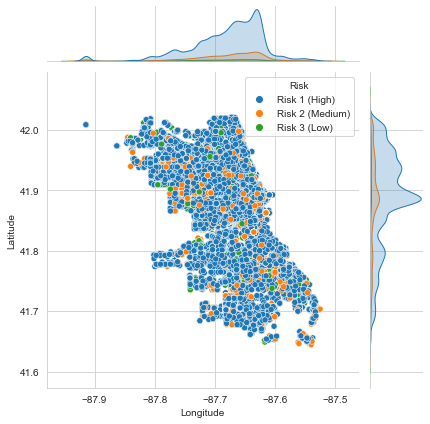

In [26]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.jointplot(y="Latitude", x="Longitude", data=df, hue = 'Risk')
plt.show()

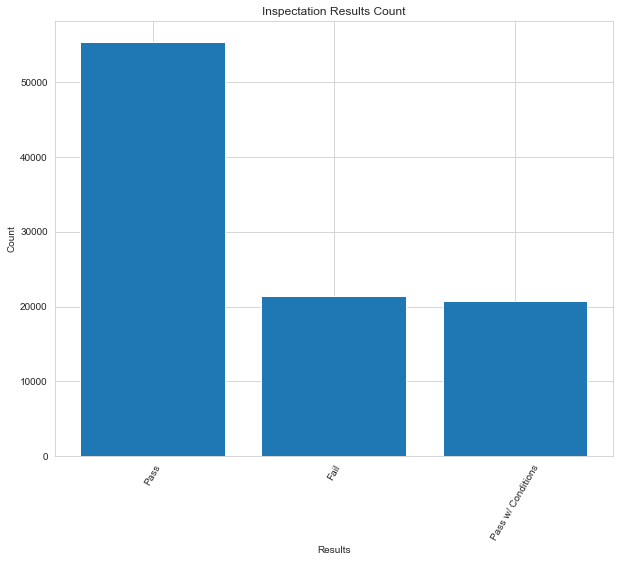

In [27]:
# Results count.
x = df['Results'].value_counts().index.values.astype('str')
y = df['Results'].value_counts().values
plt.figure(figsize = (10,8))
plt.bar(x,y)
plt.xticks(rotation = 60)
plt.xlabel("Results")
plt.ylabel("Count")
plt.title("Inspectation Results Count")
plt.show()

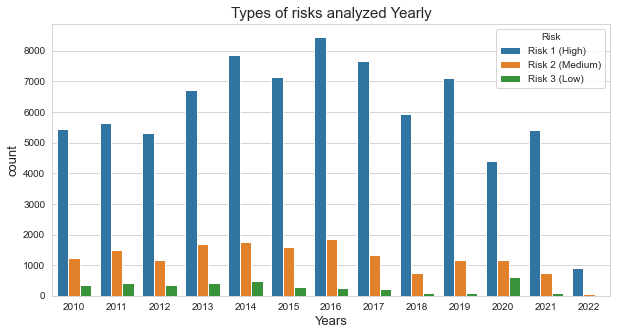

In [28]:
# Types of risks analyzed Yearly
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
fig=sns.countplot(x="Year", data=df ,hue='Risk')
plt.title('Types of risks analyzed Yearly', fontsize=15)
plt.xlabel("Years", fontsize=13)
plt.ylabel("count", fontsize=13)
plt.show()

#### We can observe that at mid years the risk is increased.

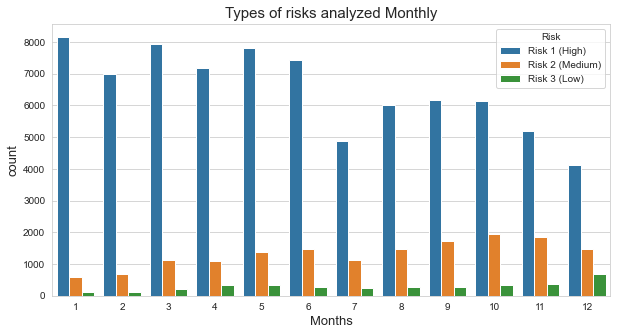

In [29]:
# Types of risks analyzed Monthly
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
fig=sns.countplot(x="Month", data=df ,hue='Risk')
plt.title('Types of risks analyzed Monthly', fontsize=15)
plt.xlabel("Months", fontsize=13)
plt.ylabel("count", fontsize=13)
plt.show()

#### There are few up downs in the risks at mid months.

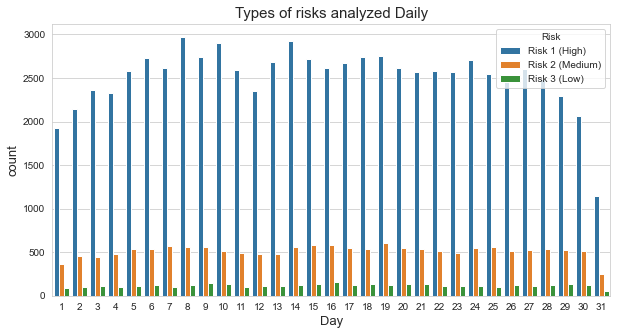

In [30]:
#Types of risks analyzed Daily
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
fig=sns.countplot(x="Day", data=df ,hue='Risk')
plt.title('Types of risks analyzed Daily', fontsize=15)
plt.xlabel("Day", fontsize=13)
plt.ylabel("count", fontsize=13)
plt.show()

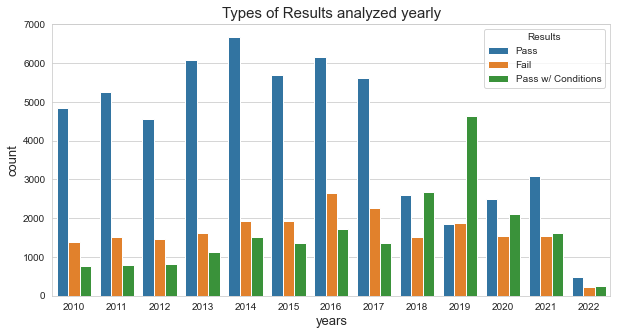

In [31]:
# Types of Results analyzed yearly
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
fig=sns.countplot(x="Year", data=df ,hue='Results')
plt.title('Types of Results analyzed yearly', fontsize=15)
plt.xlabel("years", fontsize=13)
plt.ylabel("count", fontsize=13)
plt.show()

#### Most of the inspections passd in the mid years

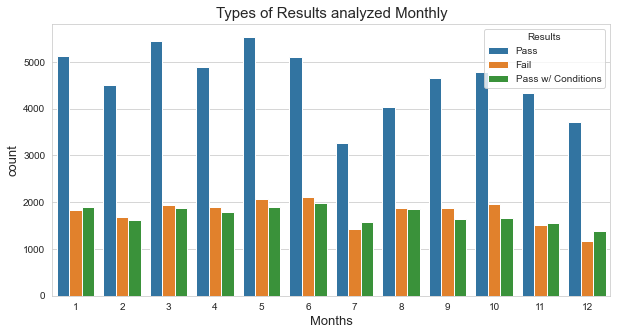

In [32]:
# Types of Results analyzed Monthly
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
fig=sns.countplot(x="Month", data=df ,hue='Results')
plt.title('Types of Results analyzed Monthly', fontsize=15)
plt.xlabel("Months", fontsize=13)
plt.ylabel("count", fontsize=13)
plt.show()

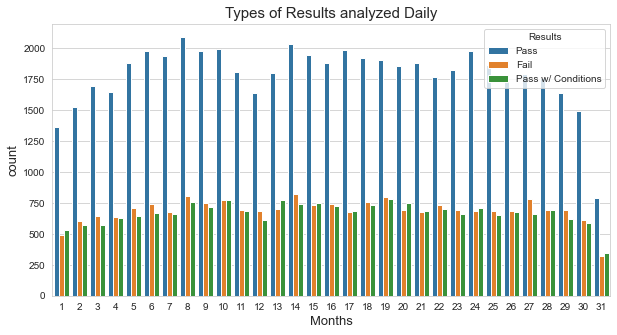

In [33]:
# Types of Results analyzed Daily
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
fig=sns.countplot(x="Day", data=df ,hue='Results')
plt.title('Types of Results analyzed Daily', fontsize=15)
plt.xlabel("Months", fontsize=13)
plt.ylabel("count", fontsize=13)
plt.show()

In [34]:
# converting the violations to numerical.
def split_violations(violations):
    values_row = pd.Series([])
    if type(violations) == str:
        violations = violations.split(' | ')
        for violation in violations:
            index = "v_" + violation.split('.')[0]
            values_row[index] = 1
    return values_row

# Calculate violation values (5 mins), set missing violations to 0
values_data = df.Violations.apply(split_violations).fillna(0)

# Generate column names
critical_columns = [("v_" + str(num)) for num in range(1, 15)]
serious_columns = [("v_" + str(num)) for num in range(15, 30)]
minor_columns = [("v_" + str(num)) for num in range(30, 45)]
minor_columns.append("v_70")

# Create complete list of column names
columns = critical_columns + serious_columns + minor_columns

# Create dataframe using column names, violation data and inspection ID
values = pd.DataFrame(values_data, columns=columns)
values['Inspection ID'] = df['Inspection ID']
values['Results'] = df['Results']

In [35]:
print(values.shape)
values.head()

(97590, 47)


,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,v_15,v_16,v_17,v_18,v_19,v_20,v_21,v_22,v_23,v_24,v_25,v_26,v_27,v_28,v_29,v_30,v_31,v_32,v_33,v_34,v_35,v_36,v_37,v_38,v_39,v_40,v_41,v_42,v_43,v_44,v_70,Inspection ID,Results
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2549438,Pass
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2546140,Pass
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2529100,Pass
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2523018,Pass
27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2522101,Pass


In [36]:
# Finding the counts for each type. 
counts = pd.DataFrame({
    "critical_count": values[critical_columns].sum(axis=1),
    "serious_count": values[serious_columns].sum(axis=1),
    "minor_count": values[minor_columns].sum(axis=1)
})

counts['Inspection ID'] = df['Inspection ID']

In [37]:
counts.head()

,critical_count,serious_count,minor_count,Inspection ID
0,0.0,0.0,0.0,2549438
3,0.0,0.0,0.0,2546140
12,0.0,0.0,0.0,2529100
24,0.0,0.0,0.0,2523018
27,0.0,0.0,0.0,2522101


In [38]:
# creating new dataframe for violations.
titles = pd.DataFrame({
    "v_1": "Approved food sources (1)",
    "v_2": "Hot/cold storage facilities (2)",
    "v_3": "Hot/cold storage temp. (3)",
    "v_4": "Contaminant protection (4)",
    "v_5": "No sick handlers (5)",
    "v_6": "Proper hand washing (6)",
    "v_7": "Proper utensil washing (7)",
    "v_8": "Proper sanitizing solution (8)",
    "v_9": "Hot/cold water supply (9)",
    "v_10": "Waste water disposal (10)",
    "v_11": "Adequate toilet facilities (11)",
    "v_12": "Adequate hand washing facilities (12)",
    "v_13": "Control of rodents, other pests (13)",
    "v_14": "Correct serious violations (14)",
    "v_15": "No re-served food (15)",
    "v_16": "Protection from contamination (16)",
    "v_17": "Proper thawing (17)",
    "v_18": "Pest control, associated areas (18)",
    "v_19": "Proper garbage area (19)",
    "v_20": "Proper garbage storage (20)",
    "v_21": "Oversight of hazardous food (21)",
    "v_22": "Dishwasher maintenance (22)",
    "v_23": "Scrape before washing (23)",
    "v_24": "Proper dishwashers (24)",
    "v_25": "Minimize toxic materials (25)",
    "v_26": "Adequate customer toilets (26)",
    "v_27": "Supplied toilet facilities (27)",
    "v_28": "Visible inspection report (28)",
    "v_29": "Correct minor violations (29)",
    "v_30": "Labelled containers (30)",
    "v_31": "Sterile utensils (31)",
    "v_32": "Clean, maintain equipment (32)",
    "v_33": "Clean, sanitize utensils (33)",
    "v_34": "Clean, maintain floor (34)",
    "v_35": "Maintain walls & ceiling (35)",
    "v_36": "Proper lighting (36)",
    "v_37": "Toilet rooms vented (37)",
    "v_38": "Proper venting, plumbing (38)",
    "v_39": "Linen, clothing storage (39)",
    "v_40": "Proper thermometers (40)",
    "v_41": "Clean facilities, store supplies (41)",
    "v_42": "Ice handling, hairnets, clothes (42)",
    "v_43": "Ice equipment storage (43)",
    "v_44": "Restrict prep area traffic (44)",
    "v_70": "Restrict smoking (70)"
}, index=[0])

In [39]:
titles

,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,v_15,v_16,v_17,v_18,v_19,v_20,v_21,v_22,v_23,v_24,v_25,v_26,v_27,v_28,v_29,v_30,v_31,v_32,v_33,v_34,v_35,v_36,v_37,v_38,v_39,v_40,v_41,v_42,v_43,v_44,v_70
0,Approved food sources (1),Hot/cold storage facilities (2),Hot/cold storage temp. (3),Contaminant protection (4),No sick handlers (5),Proper hand washing (6),Proper utensil washing (7),Proper sanitizing solution (8),Hot/cold water supply (9),Waste water disposal (10),Adequate toilet facilities (11),Adequate hand washing facilities (12),"Control of rodents, other pests (13)",Correct serious violations (14),No re-served food (15),Protection from contamination (16),Proper thawing (17),"Pest control, associated areas (18)",Proper garbage area (19),Proper garbage storage (20),Oversight of hazardous food (21),Dishwasher maintenance (22),Scrape before washing (23),Proper dishwashers (24),Minimize toxic materials (25),Adequate customer toilets (26),Supplied toilet facilities (27),Visible inspection report (28),Correct minor violations (29),Labelled containers (30),Sterile utensils (31),"Clean, maintain equipment (32)","Clean, sanitize utensils (33)","Clean, maintain floor (34)",Maintain walls & ceiling (35),Proper lighting (36),Toilet rooms vented (37),"Proper venting, plumbing (38)","Linen, clothing storage (39)",Proper thermometers (40),"Clean facilities, store supplies (41)","Ice handling, hairnets, clothes (42)",Ice equipment storage (43),Restrict prep area traffic (44),Restrict smoking (70)


## Feature Selection

#### I have selected only the violations and results columns for modelling.

In [40]:
x=values.drop("Results",axis=1)
y=values["Results"]

# train_test_split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)

print(f'Training examples: {x_train.shape[0]:,}')
print(f'Test examples: {x_test.shape[0]:,}')

Training examples: 58,554
Test examples: 39,036


In [42]:
from sklearn.naive_bayes import MultinomialNB
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = RandomForestClassifier()
clf4 = MultinomialNB()

pipe1 = Pipeline([('logreg', clf1)])
pipe2 = Pipeline([('tree', clf2)])
pipe3 = Pipeline([('randomforest', clf3)])
pipe4 = Pipeline([('naivebayes',clf4)])

labs = ['Logistic Regression', 'Decision Tree', 'RandomForest', 'Naive Bayes']
clfs = [pipe1, pipe2, pipe3, pipe4]
clfs = zip(labs, clfs)

algo = []
acc = []
for lab, clf in clfs:
    scores = cross_val_score(estimator=clf, X=x_train, y=y_train, cv=10, scoring='accuracy')
    print(f'Accuracy {scores.mean():.2f} [{lab}]')
    algo.append(lab)
    acc.append(scores.mean())

models = pd.DataFrame(algo, columns=['algorithms'])
models['accuracy']=acc
models.head()

Accuracy 0.57 [Logistic Regression]
Accuracy 0.89 [Decision Tree]
Accuracy 0.90 [RandomForest]
Accuracy 0.85 [Naive Bayes]


,algorithms,accuracy
0,Logistic Regression,0.568484
1,Decision Tree,0.888359
2,RandomForest,0.902210
3,Naive Bayes,0.848977


#### Here we can notice that Random forest has highest score followed by Decision tree.

## Hyper-Parameters tuning

In [43]:
# Tuning the hyperparameters and finding the best parameters.
def find_best_model(X, y):
    
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [0.01,0.1,1,5,10],
                'penalty' : ['l2']
               }
        },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },
        
        'Naive Bayes': {
            'model': MultinomialNB(),
            'parameters': {
                'alpha': [0.01,0.1,1.5,2.8]
            }

        }
    }
    scores = [] 
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(x_train, y_train)

,model,best_parameters,score
0,logistic_regression,"{'C': 0.01, 'penalty': 'l2'}",0.567125
1,decision_tree,"{'criterion': 'gini', 'max_depth': 10}",0.893331
2,random_forest,{'n_estimators': 50},0.903578
3,Naive Bayes,{'alpha': 0.01},0.850329


#### Here we can notice four models with best parameters and their scores.

#### For further analysis I am considering only the Random Forst because it has the highest score.

In [44]:
# Using cross_val_score for gaining average accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=20, random_state=0), x_train, y_train, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Average Accuracy : 90%


In [45]:
# Creating Random Forest Model
classifier = RandomForestClassifier(n_estimators=20, random_state=0,)
classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [46]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 6925,   399,  1140],
       [  381, 21484,   272],
       [ 1254,   375,  6806]])

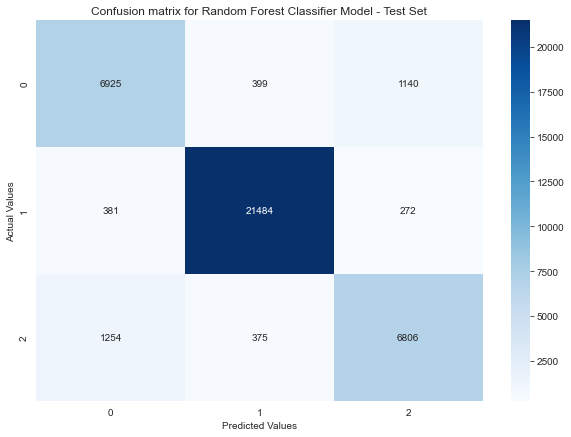

In [47]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [48]:
# Accuracy Score
score = round(accuracy_score(y_test, y_pred),4)*100
print("Accuracy on test set: {}%".format(score))

Accuracy on test set: 90.21000000000001%


In [49]:
# Classification Report.
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

              Fail       0.81      0.82      0.81      8464
              Pass       0.97      0.97      0.97     22137
Pass w/ Conditions       0.83      0.81      0.82      8435

          accuracy                           0.90     39036
         macro avg       0.87      0.87      0.87     39036
      weighted avg       0.90      0.90      0.90     39036



In [50]:
# Creating a confusion matrix for training set.
y_train_pred = classifier.predict(x_train)
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[12865,    25,    38],
       [   21, 33258,     8],
       [   59,    54, 12226]])

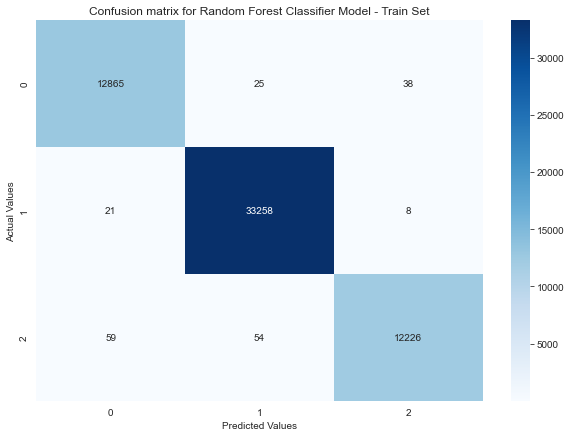

In [51]:
# Plotting the confusion matrix.
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Train Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [52]:
# Accuracy Score.
score = round(accuracy_score(y_train, y_train_pred),4)*100
print("Accuracy on trainning set: {}%".format(score))

Accuracy on trainning set: 99.65%


In [53]:
# Classification Report.
print(classification_report(y_train, y_train_pred))

                    precision    recall  f1-score   support

              Fail       0.99      1.00      0.99     12928
              Pass       1.00      1.00      1.00     33287
Pass w/ Conditions       1.00      0.99      0.99     12339

          accuracy                           1.00     58554
         macro avg       1.00      1.00      1.00     58554
      weighted avg       1.00      1.00      1.00     58554



In [54]:

# Printing the ROC and AUC scores.
y_prob = classifier.predict_proba(x_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(
    y_test, y_prob, multi_class="ovo", average="weighted"
)
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted"
)
print(
    "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo)
)
print(
    "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr)
)

One-vs-One ROC AUC scores:
0.953788 (macro),
0.962683 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.964055 (macro),
0.971900 (weighted by prevalence)


# Findings

#### Performance of Random Forest is good with 91% accuracy.
#### Followed by Decision tree model is good with 90% accuracy.
#### Logistic Regression performance is very low.

# Further Exploration

#### The purpose is to improve the food produced in the Chicago area in terms of quality, health, and efficiency. We want to improve our data analysis by developing a prediction model that combines environmental data to assist us target and correct food inspection violations at their sources.
#### In further, we can fine-tune hyperparameters, add meteorological data, and provide inspectors with the shortest way between sites, allowing them to save time and money by visiting many locations.

# References : 

https://data.cityofchicago.org/Health-Human-Services/Food-Inspections/4ijn-s7e5/data

https://data.cityofchicago.org/api/assets/BAD5301B-681A-4202-9D25-51B2CAE672FF

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

https://www.kaggle.com/hamditarek/food-inspections-in-chicago-eda-and-modeling#Show-suspected-locations-in-the-map-with-Risks-High-and-Medium